# Point pattern analysis

>Ripley's alphabet functions

Contain many statistics for measuring point pattern analysis.

In [1]:
import geopandas as gpd 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import contextily as ctx 
import matplotlib.pyplot as plt 
from pointpats import distance_statistics, QStatistic, random, PointPattern

In [2]:
locs_pdf = pd.read_csv('../data/NM_OSM_DollarGeneralLocs.csv')
locs_gdf = gpd.GeoDataFrame(locs_pdf, 
                           geometry=gpd.points_from_xy(
                               locs_pdf.X, locs_pdf.Y
                           ), crs="EPSG:4326")

In [15]:
fd_locs_pdf = pd.read_csv('../data/NM_OSM_FamilyDollarLocs.csv')
fd_locs_gdf = gpd.GeoDataFrame(fd_locs_pdf, 
                           geometry=gpd.points_from_xy(
                               fd_locs_pdf.X, fd_locs_pdf.Y
                           ), crs="EPSG:4326")

In [3]:
from us import states

In [4]:
states.NM.shapefile_urls()

{'tract': 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_35_tract10.zip',
 'cd': 'https://www2.census.gov/geo/tiger/TIGER2010/CD/111/tl_2010_35_cd111.zip',
 'county': 'https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_35_county10.zip',
 'state': 'https://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_35_state10.zip',
 'zcta': 'https://www2.census.gov/geo/tiger/TIGER2010/ZCTA5/2010/tl_2010_35_zcta510.zip',
 'block': 'https://www2.census.gov/geo/tiger/TIGER2010/TABBLOCK/2010/tl_2010_35_tabblock10.zip',
 'blockgroup': 'https://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_35_bg10.zip'}

In [5]:
nm = gpd.read_file('https://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_35_state10.zip')

In [6]:
nm = nm.to_crs(locs_gdf.crs)

In [7]:
nm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
locs_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

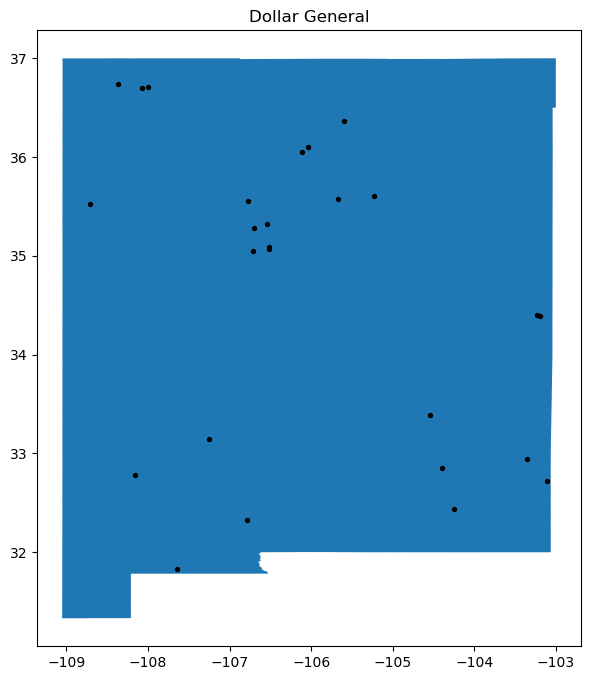

In [16]:
f, ax = plt.subplots(figsize=(8,8))
nm.plot(ax=ax, color=None, zorder=1)
locs_gdf.plot(ax=ax, zorder=2, color='k', markersize=8)
plt.title("Dollar General");

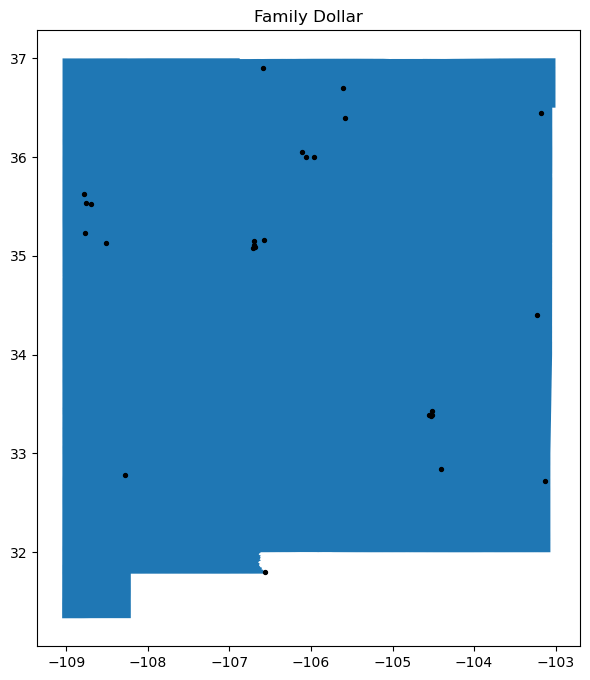

In [17]:
f, ax = plt.subplots(figsize=(8,8))
nm.plot(ax=ax, color=None, zorder=1)
fd_locs_gdf.plot(ax=ax, zorder=2, color='k', markersize=8)
plt.title('Family Dollar');

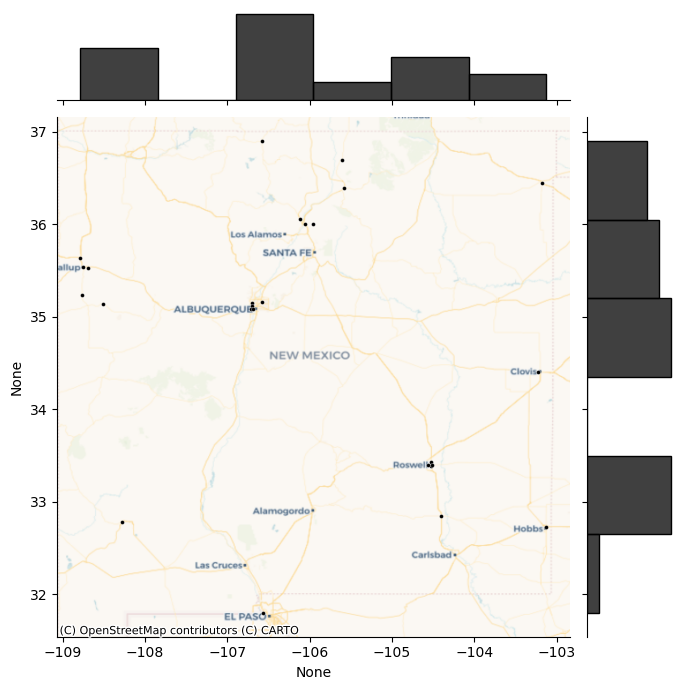

In [19]:
fd_joint_axes = sns.jointplot(
    x=fd_locs_gdf.geometry.x, 
    y=fd_locs_gdf.geometry.y, 
    data=fd_locs_gdf, 
    s=8, 
    height=7, 
    color='k'
)
ctx.add_basemap(fd_joint_axes.ax_joint, crs=fd_locs_gdf.crs, 
               source=ctx.providers.CartoDB.Voyager);

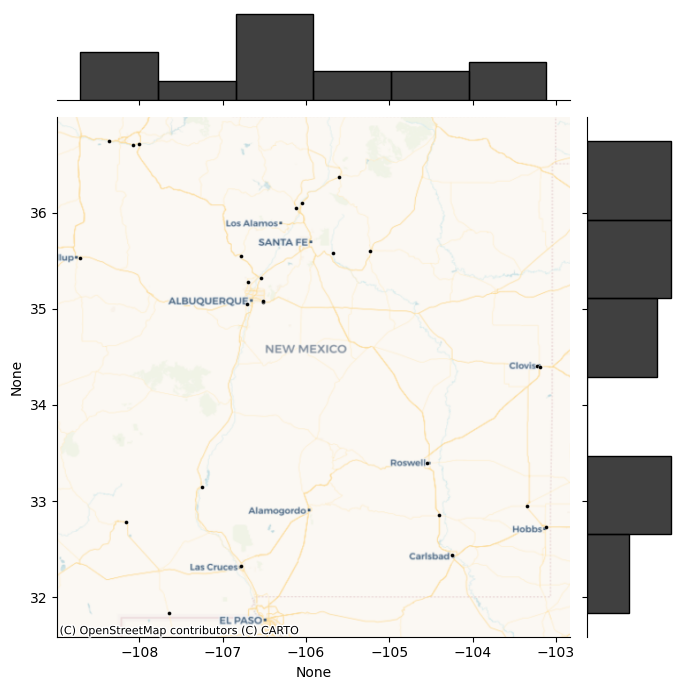

In [20]:
joint_axes = sns.jointplot(
    x=locs_gdf.geometry.x, 
    y=locs_gdf.geometry.y, 
    data=locs_gdf, 
    s=8, 
    height=7, 
    color='k'
)
ctx.add_basemap(joint_axes.ax_joint, crs=locs_gdf.crs, 
               source=ctx.providers.CartoDB.Voyager);

# Ripleys' G

Cumulative distribution function based on nearest neighbors

In [11]:
g_test = distance_statistics.g_test(
    locs_gdf[['X','Y']].values, support=40, 
    keep_simulations=True
)

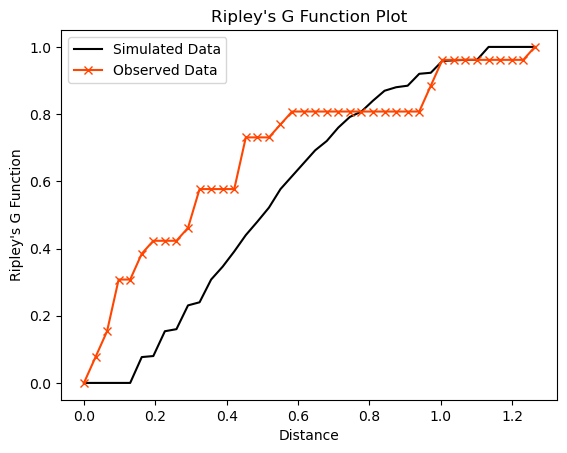

In [12]:
plt.plot(
    g_test.support, np.median(g_test.simulations, axis=0), 
    color='k', label='Simulated Data'
)
plt.plot(g_test.support, g_test.statistic, 
        marker='x', color='orangered', label='Observed Data')
plt.legend()
plt.xlabel('Distance')
plt.ylabel("Ripley's G Function")
plt.title("Ripley's G Function Plot");

# Ripley's K 

Considers all distances, not just closest neighbor

In [13]:
k_test = distance_statistics.k_test(locs_gdf[['X','Y']].values, 
                                    keep_simulations=True)

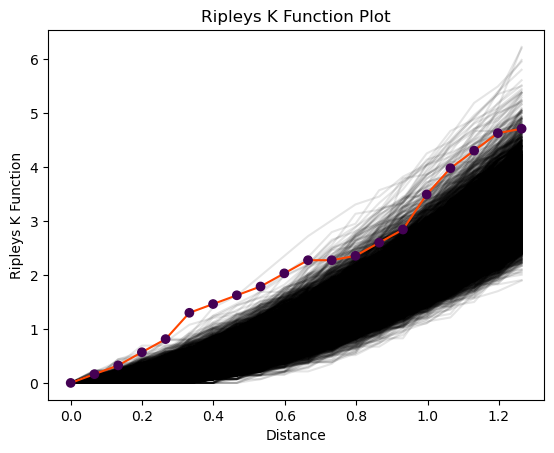

In [14]:
plt.plot(k_test.support, k_test.simulations.T, color='k', alpha=0.1)
plt.plot(k_test.support, k_test.statistic, color='orangered')
plt.scatter(k_test.support, k_test.statistic, cmap='viridis', 
           c=k_test.pvalue < 0.5, zorder=4)
plt.xlabel('Distance')
plt.ylabel('Ripleys K Function')
plt.title('Ripleys K Function Plot');